In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
train_df=pd.read_csv(r"D:\data\blackfrdy\train.csv")
test_df=pd.read_csv(r"D:\data\blackfrdy\test.csv")

In [3]:
train_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
test_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [5]:
train_df.shape , test_df.shape

((550068, 12), (233599, 11))

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [7]:
train_df.isnull().sum()/len(train_df)*100

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.566643
Product_Category_3            69.672659
Purchase                       0.000000
dtype: float64

In [8]:
test_df.isnull().sum()/len(test_df)*100

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            30.969311
Product_Category_3            69.590195
dtype: float64

In [9]:
train_df.drop(['Product_Category_3'],axis=1,inplace=True)
test_df.drop(['Product_Category_3'],axis=1,inplace=True)

In [10]:
train_df['Product_Category_2'].nunique()

17

In [11]:
train_df['Product_Category_2'].value_counts()

8.0     64088
14.0    55108
2.0     49217
16.0    43255
15.0    37855
5.0     26235
4.0     25677
6.0     16466
11.0    14134
17.0    13320
13.0    10531
9.0      5693
12.0     5528
10.0     3043
3.0      2884
18.0     2770
7.0       626
Name: Product_Category_2, dtype: int64

In [12]:
test_df['Product_Category_2'].value_counts()

8.0     27229
14.0    23726
2.0     21281
16.0    18432
15.0    16259
4.0     11028
5.0     10930
6.0      7109
11.0     6096
17.0     5784
13.0     4523
9.0      2484
12.0     2273
10.0     1377
18.0     1257
3.0      1239
7.0       228
Name: Product_Category_2, dtype: int64

In [13]:
train_df['Product_Category_1'].value_counts()

5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category_1, dtype: int64

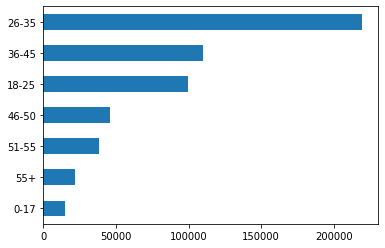

In [14]:
train_df['Age'].value_counts().sort_values().plot(kind='barh')

In [15]:
train_df.loc[(train_df['Age']=='26-35')&(train_df['Product_Category_2'].isnull()),]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,7871
11,1000005,P00014542,M,26-35,20,A,1,1,8,NaN,3957
12,1000005,P00031342,M,26-35,20,A,1,1,8,NaN,6073
21,1000008,P00156442,M,26-35,12,C,4+,1,8,NaN,9872
22,1000008,P00213742,M,26-35,12,C,4+,1,8,NaN,9743
...,...,...,...,...,...,...,...,...,...,...,...
550058,1006024,P00372445,M,26-35,12,A,0,1,20,NaN,121
550059,1006025,P00370853,F,26-35,1,B,1,0,19,NaN,48
550061,1006029,P00372445,F,26-35,1,C,1,1,20,NaN,599
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,371


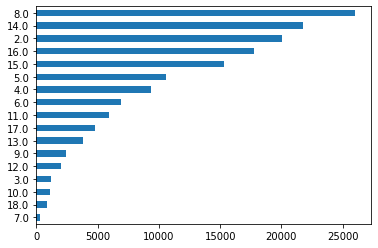

In [16]:
train_df[train_df['Age']=='26-35']['Product_Category_2'].value_counts().sort_values().plot(kind='barh')

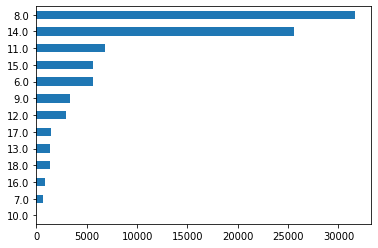

In [17]:
train_df[train_df['Product_Category_1']==5]['Product_Category_2'].value_counts().sort_values().plot(kind='barh')

In [18]:
train_df['Product_Category_2'].fillna(8,inplace=True)
test_df['Product_Category_2'].fillna(8,inplace=True)

In [19]:
train_df.isnull().sum() , test_df.isnull().sum()

(User_ID                       0
 Product_ID                    0
 Gender                        0
 Age                           0
 Occupation                    0
 City_Category                 0
 Stay_In_Current_City_Years    0
 Marital_Status                0
 Product_Category_1            0
 Product_Category_2            0
 Purchase                      0
 dtype: int64, User_ID                       0
 Product_ID                    0
 Gender                        0
 Age                           0
 Occupation                    0
 City_Category                 0
 Stay_In_Current_City_Years    0
 Marital_Status                0
 Product_Category_1            0
 Product_Category_2            0
 dtype: int64)

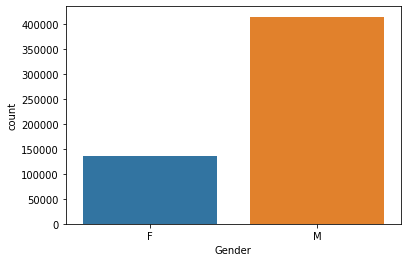

In [20]:
sns.countplot(x='Gender',data=train_df)

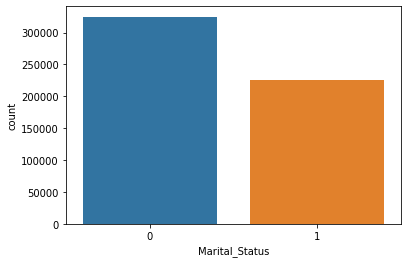

In [21]:
sns.countplot(x='Marital_Status',data=train_df)

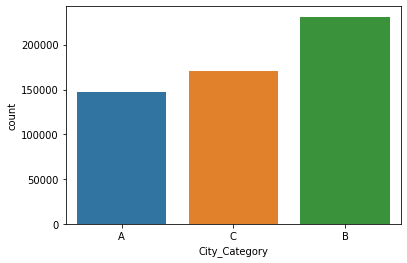

In [22]:
sns.countplot(x='City_Category',data=train_df)

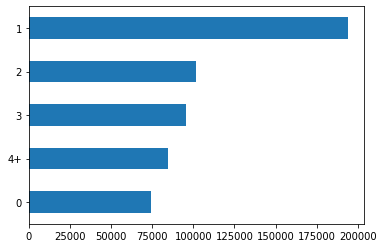

In [23]:
train_df['Stay_In_Current_City_Years'].value_counts().sort_values().plot(kind='barh')

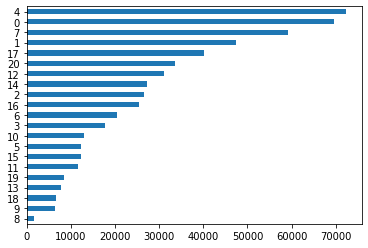

In [24]:
train_df['Occupation'].value_counts().sort_values().plot(kind='barh')

In [25]:
train_df['Product_ID'].nunique()

3631

In [26]:
train_df['User_ID'].nunique()

5891

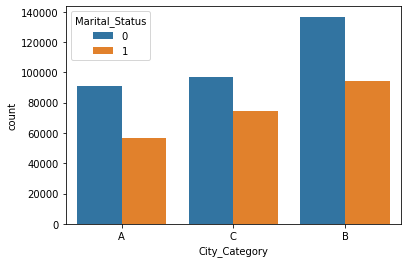

In [27]:
sns.countplot(x='City_Category',hue='Marital_Status',data=train_df)

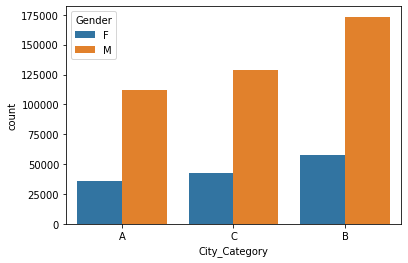

In [28]:
sns.countplot(x='City_Category',hue='Gender',data=train_df)

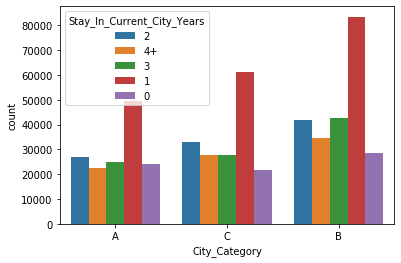

In [29]:
sns.countplot(x='City_Category',hue='Stay_In_Current_City_Years',data=train_df)

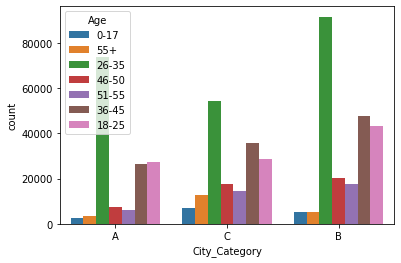

In [30]:
sns.countplot(x='City_Category',hue='Age',data=train_df)

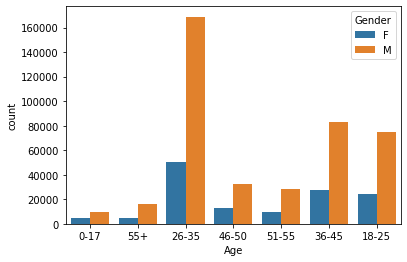

In [31]:
sns.countplot(x='Age',hue='Gender',data=train_df)

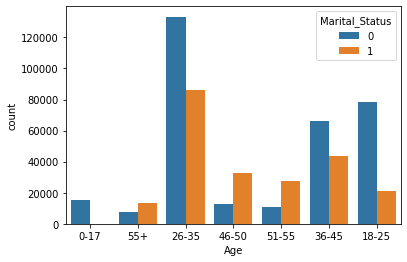

In [32]:
sns.countplot(x='Age',hue='Marital_Status',data=train_df)

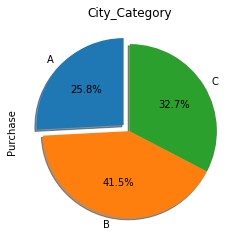

In [33]:
train_df.groupby('City_Category')['Purchase'].sum().plot.pie(title="City_Category", startangle=90, explode=(0.1, 0, 0), autopct="%1.1f%%", shadow=True)

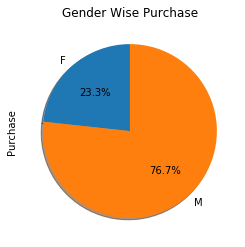

In [34]:
train_df.groupby('Gender')['Purchase'].sum().plot.pie(title='Gender Wise Purchase',startangle=90,autopct='%1.1f%%',shadow=True,explode=(0,0))

Text(0.5, 1.0, 'Age Wise Purchase')

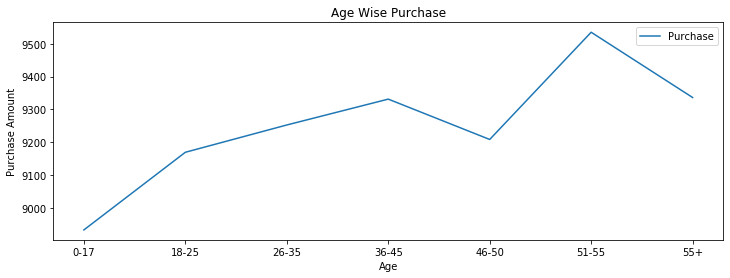

In [35]:
data=pd.DataFrame(train_df.groupby('Age')['Purchase'].mean())
plt.figure(figsize = (12,4))
sns.lineplot(data=data)
plt.ylabel("Purchase Amount")
plt.title("Age Wise Purchase")

Text(0.5, 1.0, 'Stay in Current City in years vs Purchase Amount')

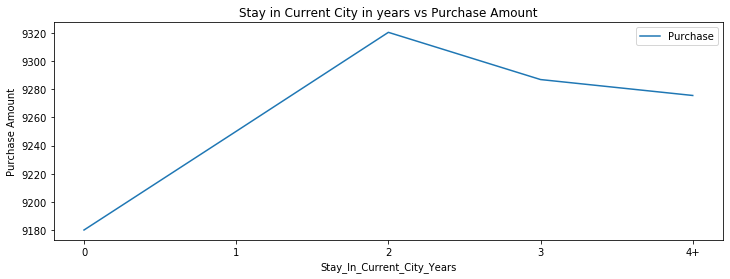

In [36]:
data=pd.DataFrame(train_df.groupby('Stay_In_Current_City_Years')['Purchase'].mean())
plt.figure(figsize = (12,4))
sns.lineplot(data=data)
plt.ylabel("Purchase Amount")
plt.title("Stay in Current City in years vs Purchase Amount")

Text(0.5, 1.0, 'Occupation vs Purchase')

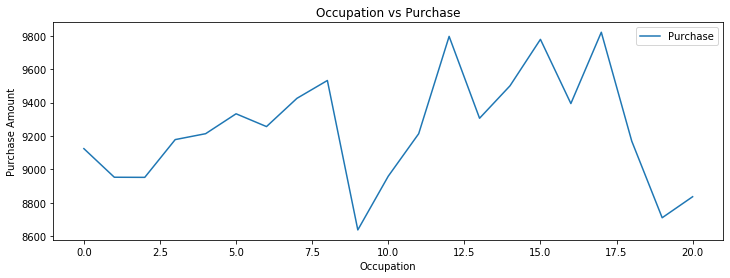

In [37]:
data=pd.DataFrame(train_df.groupby('Occupation')['Purchase'].mean())
plt.figure(figsize = (12,4))
sns.lineplot(data=data)
plt.ylabel("Purchase Amount")
plt.title("Occupation vs Purchase")

Text(0.5, 1.0, 'Product Category_1 Purchase Amount')

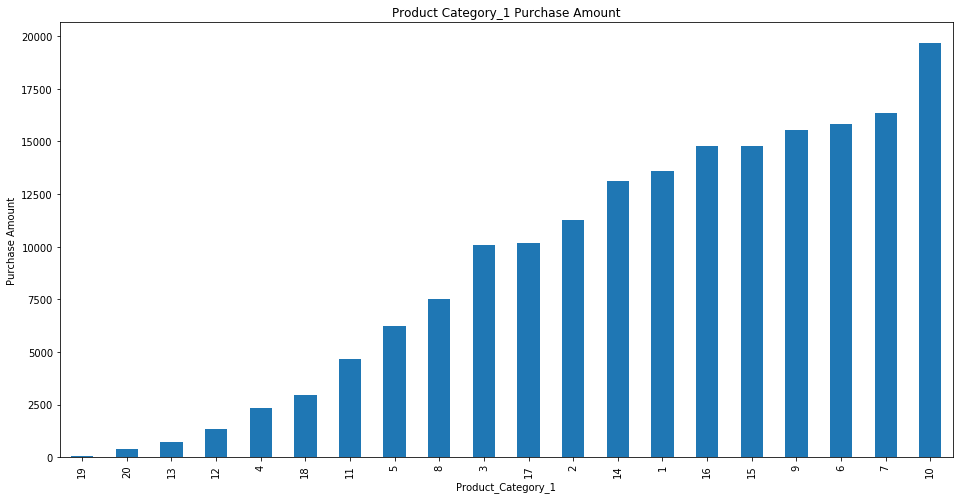

In [38]:
plt.figure(figsize = (16,8))
(train_df.groupby('Product_Category_1')['Purchase'].mean()).sort_values().plot(kind='bar')
plt.ylabel("Purchase Amount")
plt.title("Product Category_1 Purchase Amount")

Text(0.5, 1.0, 'Product Category_2 Purchase Amount')

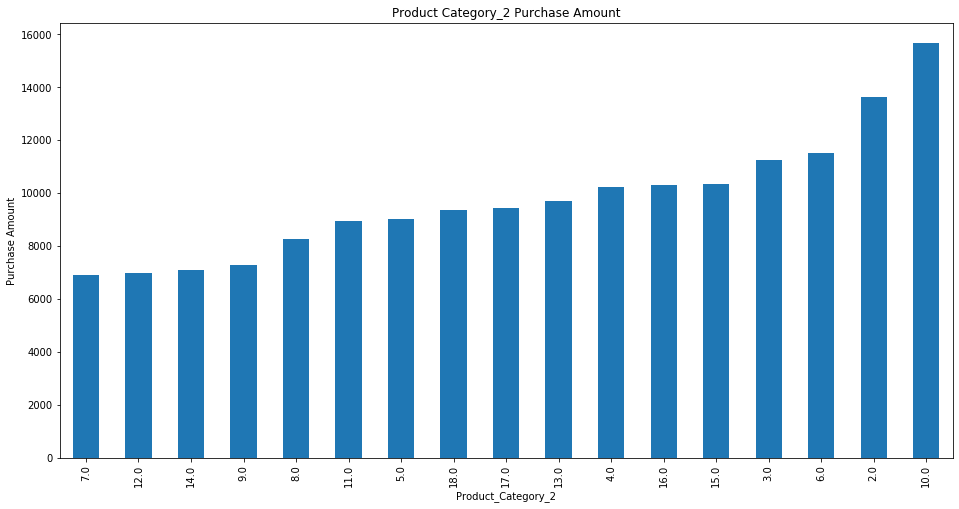

In [39]:
plt.figure(figsize = (16,8))
(train_df.groupby('Product_Category_2')['Purchase'].mean()).sort_values().plot(kind='bar')
plt.ylabel("Purchase Amount")
plt.title("Product Category_2 Purchase Amount")

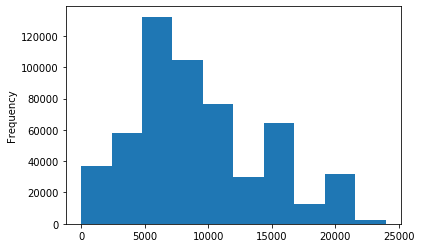

In [40]:
train_df['Purchase'].plot(kind='hist')

(6.0, 0.0)

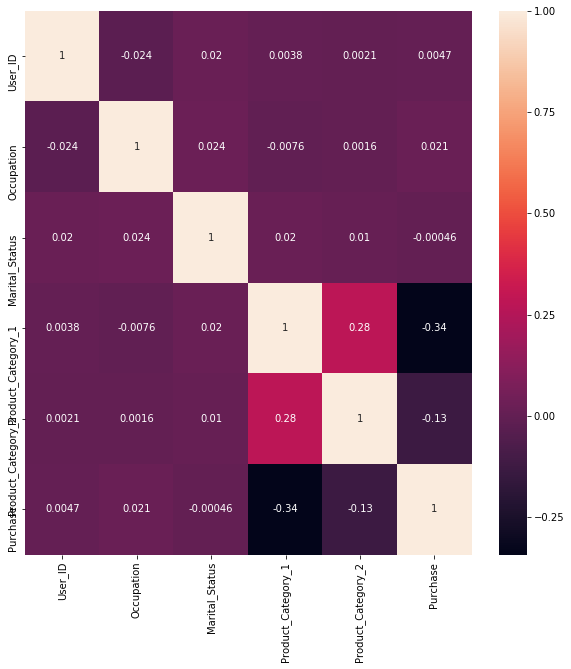

In [41]:
plt.figure(figsize = (10,10))
ax=sns.heatmap(train_df.corr(), annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [42]:
train_df['Product_Category_2']=train_df['Product_Category_2'].astype('int64')
test_df['Product_Category_2']=test_df['Product_Category_2'].astype('int64')
train_df['Stay_In_Current_City_Years']=train_df['Stay_In_Current_City_Years'].str.strip('+')
test_df['Stay_In_Current_City_Years']=test_df['Stay_In_Current_City_Years'].str.strip('+')
train_df['Stay_In_Current_City_Years']=train_df['Stay_In_Current_City_Years'].astype('int64')
test_df['Stay_In_Current_City_Years']=test_df['Stay_In_Current_City_Years'].astype('int64')

In [43]:
train_df['Gender']=train_df['Gender'].apply(lambda x: 1 if x=='M' else 0)
test_df['Gender']=test_df['Gender'].apply(lambda x: 1 if x=='M' else 0)

In [44]:
def mapping_age(age):
    if age=='0-17':
        return 0
    elif age=='18-25':
        return 1
    elif age=='26-35':
        return 2
    elif age=='36-45':
        return 3
    elif age=='46-50':
        return 4
    elif age=='51-55':
        return 5
    else:
        return 6
        

In [45]:
train_df['Age']=train_df['Age'].apply(mapping_age)
test_df['Age']=test_df['Age'].apply(mapping_age)

In [46]:
train_df['Age'].unique()

array([0, 6, 2, 4, 5, 3, 1], dtype=int64)

In [47]:
def mapping_city(city):
    if city=='A':
        return 0
    elif city=='B':
        return 1
    else:
        return 2

In [48]:
train_df['City_Category']=train_df['City_Category'].apply(mapping_city)
test_df['City_Category']=test_df['City_Category'].apply(mapping_city)

In [49]:
train_df['City_Category'].unique()

array([0, 2, 1], dtype=int64)

In [50]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null int64
Age                           550068 non-null int64
Occupation                    550068 non-null int64
City_Category                 550068 non-null int64
Stay_In_Current_City_Years    550068 non-null int64
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            550068 non-null int64
Purchase                      550068 non-null int64
dtypes: int64(10), object(1)
memory usage: 46.2+ MB


In [51]:
train=train_df.copy()
test=test_df.copy()

In [52]:
train_df.drop(['User_ID','Product_ID'], axis=1,inplace=True)
test_df.drop(['User_ID','Product_ID'],axis=1,inplace=True)

In [53]:
X=train_df.drop(['Purchase'],axis=1)
Y=train_df['Purchase']

In [54]:
rmf = RandomForestRegressor(n_estimators=100,max_depth=5, min_samples_leaf=30,n_jobs=4)
rmf.fit(X,Y)
cv_score = cross_val_score(rmf, X, Y, cv=5)
print((np.abs(cv_score)))

[0.52965573 0.53601036 0.52638523 0.53304658 0.53961309]


In [55]:
# find the best parameter for model making
param_grid = {"n_estimators":[100, 150], 
              "max_depth":[5, 7, 9]
             }
grid_rf = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring="neg_mean_squared_error").fit(X, Y)
print("Best parameter: {}".format(grid_rf.best_params_))
print("Best score: {:.2f}".format((-1*grid_rf.best_score_)**0.5))

Best parameter: {'max_depth': 9, 'n_estimators': 150}
Best score: 2985.98


In [56]:
# make model with best parameters
model = RandomForestRegressor(n_estimators=150, max_depth=9,min_samples_leaf=30, verbose=1,n_jobs=-1)


# using cross validation
scores = cross_val_score(model, X,Y, scoring="explained_variance", cv=5)
print(scores)
print("Model effectiveness: %f" % (scores.mean()))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   24.3s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  1.4min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   22.7s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  1.3min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   22.4s
[Parallel(n_jobs=-1)]:

[0.638994   0.63976258 0.64151648 0.64139702 0.66807487]
Model effectiveness: 0.645949


[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.5s finished


In [57]:
from xgboost import XGBRegressor
xgbr=XGBRegressor(verbosity=0,n_estimeters=100,learning_rate=0.1,max_depth=8, n_jobs=-1)

print(xgbr)

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=None, max_depth=8,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_estimeters=100, n_jobs=-1,
             num_parallel_tree=None, objective='reg:squarederror',
             random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=0)


In [58]:
xgbr.fit(X,Y)
score=xgbr.score(X,Y)
print("Training score:",score)

Training score: 0.6692128888592269


In [59]:
vc_scores=cross_val_score(xgbr,X,Y,cv=5)
print("CV scores:",vc_scores)

CV scores: [0.65260672 0.65305681 0.6557368  0.65384049 0.67982091]


In [60]:
parameters_for_testing = {
    'colsample_bytree':[0.4,0.6,0.8],
    'gamma':[0,0.03,0.1,0.3],
    'min_child_weight':[1.5,6,10],
    'learning_rate':[0.1,0.07,0.05],
    'max_depth':[3,5],
    'n_estimators':[100,150,250,350,500],
    'subsample':[0.6,0.95]  
}

In [61]:
from sklearn.model_selection import RandomizedSearchCV

R_cv=RandomizedSearchCV(xgbr,param_distributions=parameters_for_testing,cv=5,n_iter=5,scoring="neg_mean_squared_error",n_jobs=-1,verbose=3).fit(X,Y)
print("best paramaters:",R_cv.best_params_)
print("best estimaters:",R_cv.best_estimator_)


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 17.5min finished


best paramaters: {'subsample': 0.95, 'n_estimators': 500, 'min_child_weight': 6, 'max_depth': 5, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 0.8}
best estimaters: XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0.1, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=5,
             min_child_weight=6, missing=nan, monotone_constraints='()',
             n_estimators=500, n_estimeters=100, n_jobs=-1, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.95,
             tree_method='exact', validate_parameters=1, verbosity=0)


In [65]:
xgbr_rscv=XGBRegressor(subsample= 0.95, n_estimators= 500, min_child_weight= 6, max_depth=5, learning_rate= 0.05, gamma=0.1, colsample_bytree= 0.8)

print(xgbr_rscv)

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=0.8, gamma=0.1,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=0.05, max_delta_step=None, max_depth=5,
             min_child_weight=6, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             objective='reg:squarederror', random_state=None, reg_alpha=None,
             reg_lambda=None, scale_pos_weight=None, subsample=0.95,
             tree_method=None, validate_parameters=None, verbosity=None)


In [66]:
xgbr_rscv.fit(X,Y)
score=xgbr_rscv.score(X,Y)
print("Training score:",score)

Training score: 0.6571172438405481


In [67]:
vc_scores=cross_val_score(xgbr,X,Y,cv=5)
print("CV scores:",vc_scores)

CV scores: [0.64444251 0.64526235 0.6471369  0.64598727 0.67234178]


In [75]:
xgbr_pred=xgbr.predict(test_df)

In [80]:
sub = pd.DataFrame({
    'Purchase': xgbr_pred,
    'User_ID': test['User_ID'],
    'Product_ID':test['Product_ID']
})

In [81]:
sub

,Purchase,User_ID,Product_ID
0,13906.596680,1000004,P00128942
1,11164.149414,1000009,P00113442
2,6348.445312,1000010,P00288442
3,2662.233643,1000010,P00145342
4,2415.048584,1000011,P00053842
...,...,...,...
233594,7385.095215,1006036,P00118942
233595,6189.472168,1006036,P00254642
233596,12709.571289,1006036,P00031842
233597,19844.300781,1006037,P00124742


In [82]:
sub.to_csv('BlackFrdy.csv',index=False)